# Birdwatch analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from google.colab import drive
import csv
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('max_seq_item', None)
pd.set_option('max_colwidth', None)
drive.mount('/gdrive')
!ls /gdrive/MyDrive/Eurecom/Proj_Sem

path="/gdrive/MyDrive/Eurecom/Proj_Sem"

Mounted at /gdrive
 agree.csv			    statistical_sentences_newXLM0.csv
 complete_notes.tsv		    statistical_sentences_newXLM1.csv
'Coronacheck Project Report.gdoc'   statistical_sentences_newXLM2.csv
 disagree.csv			    statistical_sentences_newXLM3.csv
 full_text.csv			    statistical_sentences_newXLM4.csv
 idTweet.jsonl			    statistical_sentences_newXLM.csv
 idtweetVALUES.txt		    statistical_sentences_updated0.csv
 merged_notes.tsv		    statistical_sentences_updated1.csv
 notes-00000.tsv		    statistical_sentences_updated2.csv
 old_datas			    statistical_sentences_updated3.csv
'Project presentation.gslides'	    statistical_sentences_updated4.csv
 ratings-00000.tsv		    Task2
'ratings diff.gdoc'		   'Tweet analysis .gdoc'
 README.md			    updated_notes.tsv
'Report task 3 .gdoc'		   'XLM classifier .gdoc'
 statistical_sentences.csv	    XLM.zip
 statistical_sentences_new.csv


## 1- Collect the tweet id from the notes.tsv document

In [ ]:
notes=pd.read_csv(path+"/notes-00000.tsv",sep='\t')
notes= notes.fillna("NOT AVAILABLE")

In [ ]:
notes.head()

,noteId,participantId,createdAtMillis,tweetId,classification,believable,harmful,validationDifficulty,misleadingOther,misleadingFactualError,misleadingManipulatedMedia,misleadingOutdatedInformation,misleadingMissingImportantContext,misleadingUnverifiedClaimAsFact,misleadingSatire,notMisleadingOther,notMisleadingFactuallyCorrect,notMisleadingOutdatedButNotWhenWritten,notMisleadingClearlySatire,notMisleadingPersonalOpinion,trustworthySources,summary
0,1354870745806086150,7EDD07641861C52611BCEB9F9BE7CD21,1611861332737,1353031711349739523,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,CONSIDERABLE_HARM,CHALLENGING,0,1,1,0,1,0,1,0,0,0,0,0,1,"This is a image of a Tweet that never occured, the @blklivesmatter account never tweeted this at this time and date, we checked immediately after this post was published. https://twitter.com/search?q=i%27m%20starting%20to%20get%20the%20feelin%27%20(from%3Ablklivesmatter)&amp;src=typed_query"
1,1355716996760023041,7EDD07641861C52611BCEB9F9BE7CD21,1612063094689,1355643797280083973,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,CONSIDERABLE_HARM,EASY,0,1,0,0,1,0,0,0,0,0,0,0,1,BLM as an organization is not a terrorist organization. Approximately 93 percent of recent BLM protests were peaceful. The national organization specifically calls for peaceful protest. https://acleddata.com/2020/09/03/demonstrations-political-violence-in-america-new-data-for-summer-2020/
2,1355989178622816256,7EDD07641861C52611BCEB9F9BE7CD21,1612127987903,1355529775197130753,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,CONSIDERABLE_HARM,CHALLENGING,0,1,0,0,1,1,0,0,0,0,0,0,1,"This post claims BLM as an organization does not deserve the nobel peace prize as they incited violence. BLM as an organization is specifically non-violent, and explicitly calls for that on their page, and the vast majority of BLM related protests in the US were peaceful. https://www.washingtonpost.com/politics/2020/10/16/this-summers-black-lives-matter-protesters-were-overwhelming-peaceful-our-research-finds/"
3,1356735932087611399,7EDD07641861C52611BCEB9F9BE7CD21,1612306027803,1352754599590035459,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,CONSIDERABLE_HARM,EASY,0,1,0,0,0,0,0,0,0,0,0,0,1,"This claim is false. Carter, Ford and Nixon also did not start a new war. https://www.usatoday.com/story/news/factcheck/2020/11/01/fact-check-trump-not-first-president-since-eisenhower-without-new-war/6086636002/"
4,1356747779113177095,7EDD07641861C52611BCEB9F9BE7CD21,1612308852353,1356441140959064064,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,CONSIDERABLE_HARM,CHALLENGING,0,1,0,0,0,0,0,0,0,0,0,0,1,Neither BLM nor antifa were involved in the attack on the capitol. It was instigated primarily by pro-Trump protestors. https://www.snopes.com/fact-check/trump-mob-capitol/


In [ ]:
notes.describe()

,noteId,createdAtMillis,tweetId,misleadingOther,misleadingFactualError,misleadingManipulatedMedia,misleadingOutdatedInformation,misleadingMissingImportantContext,misleadingUnverifiedClaimAsFact,misleadingSatire,notMisleadingOther,notMisleadingFactuallyCorrect,notMisleadingOutdatedButNotWhenWritten,notMisleadingClearlySatire,notMisleadingPersonalOpinion,trustworthySources
count,8.689000e+03,8.689000e+03,8.689000e+03,8689.000000,8689.000000,8689.000000,8689.000000,8689.000000,8689.000000,8689.000000,8689.000000,8689.000000,8689.000000,8689.000000,8689.000000,8689.000000
mean,1.372078e+18,1.615964e+12,1.368353e+18,0.047416,0.539418,0.049258,0.078950,0.484521,0.444700,0.058119,0.021291,0.104270,0.002187,0.013350,0.017608,0.694902
std,1.365024e+16,3.254470e+09,4.262551e+16,0.212540,0.498473,0.216418,0.269677,0.499789,0.496961,0.233983,0.144362,0.305628,0.046713,0.114776,0.131531,0.460476
min,1.352797e+18,1.611367e+12,4.343827e+17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.358621e+18,1.612756e+12,1.357777e+18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.370591e+18,1.615609e+12,1.370127e+18,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.384570e+18,1.618942e+12,1.384146e+18,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.398469e+18,1.622256e+12,1.398351e+18,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
notes.tweetId.value_counts()

1354848253729234944    61
1362811514172755969    23
1357025133219700737    22
1357078980197810179    15
1358485526421110789    13
                       ..
1384913076399529986     1
1388185250681946112     1
1370821765816016899     1
1387824391011004417     1
1397998283767914503     1
Name: tweetId, Length: 6886, dtype: int64

In [ ]:
notes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8689 entries, 0 to 8688
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   noteId                                  8689 non-null   int64 
 1   participantId                           8689 non-null   object
 2   createdAtMillis                         8689 non-null   int64 
 3   tweetId                                 8689 non-null   int64 
 4   classification                          8689 non-null   object
 5   believable                              8689 non-null   object
 6   harmful                                 8689 non-null   object
 7   validationDifficulty                    8689 non-null   object
 8   misleadingOther                         8689 non-null   int64 
 9   misleadingFactualError                  8689 non-null   int64 
 10  misleadingManipulatedMedia              8689 non-null   int64 
 11  misl

# save the save with tweetId to use it to collect the tweets text

In [ ]:
id=notes["tweetId"]

In [ ]:
id[0]

1353031711349739523

In [ ]:
id=pd.DataFrame(id)

In [ ]:
id.to_csv(path+'/idtweetVALUES.txt', index=False, header = False)




### histogramms

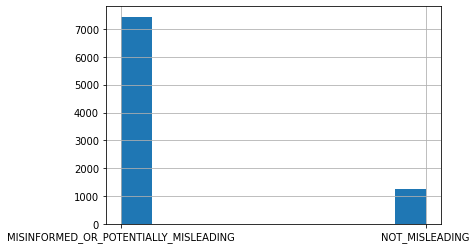

In [ ]:
notes.classification.hist()


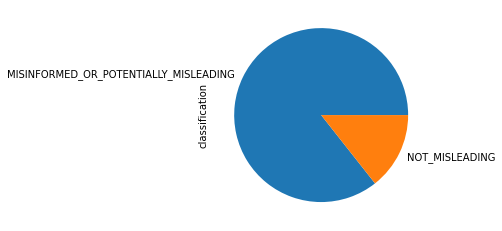

In [ ]:
notes['classification'].value_counts().plot.pie()

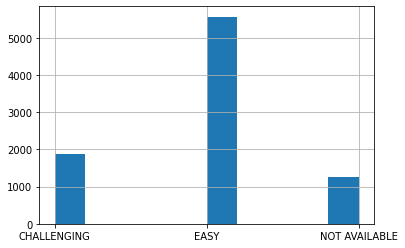

In [ ]:
notes.validationDifficulty.hist()


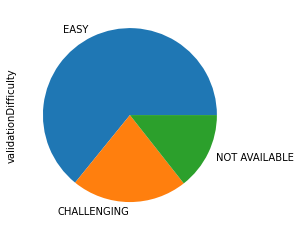

In [ ]:
notes['validationDifficulty'].value_counts().plot.pie()

In [ ]:
print(pd.crosstab(notes['classification'],notes['validationDifficulty']))

validationDifficulty                   CHALLENGING  EASY  NOT AVAILABLE
classification                                                         
MISINFORMED_OR_POTENTIALLY_MISLEADING         1866  5574              0
NOT_MISLEADING                                   0     0           1249


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc04fe13110>,
      dtype=object)

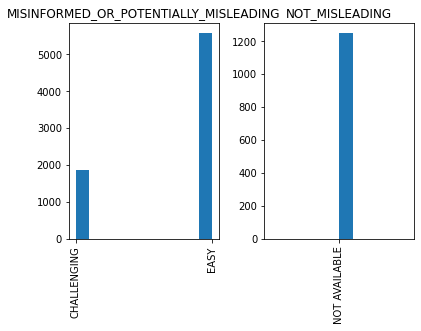

In [ ]:
notes.hist(column='validationDifficulty',by='classification')

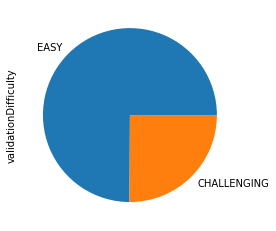

In [ ]:
notes.loc[notes['classification']=="MISINFORMED_OR_POTENTIALLY_MISLEADING"].validationDifficulty.value_counts().plot.pie()

### true claims
we consider a confirmation tweet true if there is a link to a source in the summary field.

In [17]:
true_summary=[]
for s in notes.summary :
  true_summary.append('http' in s)


In [18]:
notes['true_summary']=true_summary

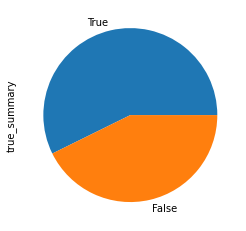

In [ ]:
notes['true_summary'].value_counts().plot.pie()

##2-  Collect the sentences from the .json file after the idTweets were processed with the hydrate.py file 

In [ ]:
#unzip the file retreived from  hydrate.py 
!gunzip /content/drive/MyDrive/Eurecom/Proj_Sem/idTweet.jsonl.gz

In [ ]:
json=pd.read_json(path+'/idTweet.jsonl', lines=True)

In [ ]:
json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,scopes,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,withheld_in_countries,withheld_scope,withheld_copyright
0,2020-02-04 05:59:10+00:00,1224573090191085568,1224573090191085568,@taraemcg https://t.co/AM93fKVbtO,False,"[9, 9]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1224573086063890434, 'id_str...","<a href=""http://twitter.com/download/iphone"" r...",1.224509e+18,1.224509e+18,427043715.0,427043715.0,taraemcg,"{'id': 1152196973258248193, 'id_str': '1152196...",NaN,NaN,None,NaN,False,0,16,False,False,0.0,und,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-27 21:00:00+00:00,1233134710638825473,1233134710638825472,CDC does not currently recommend the use of fa...,False,"[0, 279]","{'hashtags': [{'text': 'coronavirus', 'indices...","{'media': [{'id': 1233093237860163584, 'id_str...","<a href=""https://studio.twitter.com"" rel=""nofo...",NaN,NaN,NaN,NaN,None,"{'id': 146569971, 'id_str': '146569971', 'name...",NaN,NaN,None,NaN,False,8283,7686,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-21 18:41:32+00:00,1352325471539769358,1352325471539769344,@RonaldKlain Election Fraud was inevitable. De...,False,"[13, 107]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",1.351891e+18,1.351891e+18,248884036.0,248884036.0,RonaldKlain,"{'id': 1239954447972761600, 'id_str': '1239954...",NaN,NaN,None,NaN,False,0,0,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-22 23:06:44+00:00,1352754599590035459,1352754599590035456,Donald Trump is the first president in modern ...,False,"[0, 78]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 39344374, 'id_str': '39344374', 'name':...",NaN,NaN,None,NaN,False,47817,293073,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-25 12:13:37+00:00,1353677400308019200,1353677400308019200,This bill would essentially bar any American t...,False,"[0, 268]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 341527836, 'id_str': '341527836', 'name...",NaN,NaN,None,NaN,False,39,32,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
json.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,quoted_status_id,quoted_status_id_str,withheld_copyright
count,7.630000e+03,7.630000e+03,1.894000e+03,1.894000e+03,2.056000e+03,2.056000e+03,0.0,0.0,0.0,7630.000000,7.630000e+03,4563.000000,8.850000e+02,8.850000e+02,1.0
mean,1.368227e+18,1.368227e+18,1.367274e+18,1.367274e+18,5.722837e+17,5.722837e+17,NaN,NaN,NaN,3610.549410,2.011265e+04,0.015341,1.364435e+18,1.364435e+18,1.0
std,4.457049e+16,4.457049e+16,4.070874e+16,4.070874e+16,6.181814e+17,6.181814e+17,NaN,NaN,NaN,12955.408339,7.942548e+04,0.122918,5.216022e+16,5.216022e+16,NaN
min,4.343827e+17,4.343827e+17,7.094289e+17,7.094289e+17,1.059000e+04,1.059000e+04,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000,7.127081e+17,7.127081e+17,1.0
25%,1.357740e+18,1.357740e+18,1.357329e+18,1.357329e+18,8.951498e+07,8.951498e+07,NaN,NaN,NaN,1.000000,8.000000e+00,0.000000,1.356747e+18,1.356747e+18,1.0
50%,1.370184e+18,1.370184e+18,1.369305e+18,1.369305e+18,3.159014e+09,3.159014e+09,NaN,NaN,NaN,179.000000,7.920000e+02,0.000000,1.367938e+18,1.367938e+18,1.0
75%,1.384570e+18,1.384570e+18,1.381672e+18,1.381672e+18,1.319037e+18,1.319037e+18,NaN,NaN,NaN,1936.000000,7.565500e+03,0.000000,1.382852e+18,1.382852e+18,1.0
max,1.398351e+18,1.398351e+18,1.397949e+18,1.397949e+18,1.388582e+18,1.388582e+18,NaN,NaN,NaN,237565.000000,1.469723e+06,1.000000,1.398126e+18,1.398126e+18,1.0


In [ ]:
json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7630 entries, 0 to 7629
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   created_at                 7630 non-null   datetime64[ns, UTC]
 1   id                         7630 non-null   int64              
 2   id_str                     7630 non-null   int64              
 3   full_text                  7630 non-null   object             
 4   truncated                  7630 non-null   bool               
 5   display_text_range         7630 non-null   object             
 6   entities                   7630 non-null   object             
 7   extended_entities          2642 non-null   object             
 8   source                     7630 non-null   object             
 9   in_reply_to_status_id      1894 non-null   float64            
 10  in_reply_to_status_id_str  1894 non-null   float64            
 11  in_r

In [ ]:
json.id.value_counts()

1354848253729234944    40
1357025133219700737    21
1357078980197810179    13
1357714538783727618    12
1398324459640139783    11
                       ..
1360343141627400194     1
1375278905079312387     1
1361276725917667329     1
1355201510812962816     1
1362229620225888256     1
Name: id, Length: 6106, dtype: int64

In [ ]:
#check if the are some truncated sentences
json['truncated'].value_counts()


False    7630
Name: truncated, dtype: int64

In [ ]:
sentences=json['full_text']

In [ ]:
#delete the doublons
print(len(sentences.unique()))
sentences=sentences.unique()

5585


In [ ]:
for s in sentences[:1000] :
  print("---------------")
  print(s)

---------------
@taraemcg https://t.co/AM93fKVbtO
---------------
CDC does not currently recommend the use of facemasks to help prevent novel #coronavirus. Take everyday preventive actions, like staying home when you are sick and washing hands with soap and water, to help slow the spread of respiratory illness. #COVID19 https://t.co/uArGZTJhXj https://t.co/yzWTSgt2IV
---------------
@RonaldKlain Election Fraud was inevitable. Democrats control media, big tech, corruption and manipulation.
---------------
Donald Trump is the first president in modern history did not start a new war.
---------------
This bill would essentially bar any American that has rallied in support of President Trump post-election or publicly voiced concern about election fraud from being able to hold a job in the Armed Forces or any federal law enforcement agency.

 https://t.co/zRsPmG4XNW
---------------
.@JoeBiden in October: “I have this strange notion, we are a democracy … if you can’t get the votes … you can’

In [ ]:
#check the sentences related to COVID 
i=0
for s in sentences :
  if "COVID" in s  or "corona" in s :
    print("-----------------------------")
    print(s)
    i+=1
print(i)

-----------------------------
CDC does not currently recommend the use of facemasks to help prevent novel #coronavirus. Take everyday preventive actions, like staying home when you are sick and washing hands with soap and water, to help slow the spread of respiratory illness. #COVID19 https://t.co/uArGZTJhXj https://t.co/yzWTSgt2IV
-----------------------------
Why was GAM started in 2021? 

Because museums need to survive. Visitors have declined rapidly due to COVID. Museums need $ for upkeep of paintings and to pay staff and curators. They have no other sources of revenue except governments, wealthy donors, and art aficionados. #NFT
-----------------------------
Wuhan scientists were specifically creating novel coronaviruses “with the highest possible infectivity for human cells."

 https://t.co/AHbfHjdyW3
-----------------------------
My 7-part series on who created COVID-19 can be found here. 

You don't want to miss it.

https://t.co/5EejBQwVuV
-----------------------------
The Bi

In [ ]:
json['full_text'].unique()

array(['@taraemcg https://t.co/AM93fKVbtO',
       'CDC does not currently recommend the use of facemasks to help prevent novel #coronavirus. Take everyday preventive actions, like staying home when you are sick and washing hands with soap and water, to help slow the spread of respiratory illness. #COVID19 https://t.co/uArGZTJhXj https://t.co/yzWTSgt2IV',
       '@RonaldKlain Election Fraud was inevitable. Democrats control media, big tech, corruption and manipulation.',
       ...,
       "3-year-old angel, Malak Al-Tanani, was murdered this morning while sleeping in her mother's arms, along with her family, in the Zionist regime bombings of Gaza.\nMalak in Arabic means angel. 38 other angels, such as Malak, have been killed by Zionist terrorists in the past 3 days. https://t.co/HMOanzU270",
       'A new lockdown has been imposed across the West Bank as Palestinians face a fresh surge of coronavirus cases and a continued wait for a proper vaccine rollout https://t.co/TGJIQ18WVb',
   

In [ ]:
full_text=pd.DataFrame(json['full_text'].unique())
full_text.columns=['full_text']
full_text.to_csv(path+"/full_text.csv",index=False)

### save the full text sentences in the notes.tsv files

In [ ]:
notes["full_text"]=["NOT AVAILABLE" for i in range(len(notes))]
for i in range(len(notes)) :
  if notes.tweetId[i] in list(json.id) :
    text=max(json[json["id"]==notes.tweetId[i]].full_text)
    notes["full_text"][i]=text

In [ ]:
notes.head()

,noteId,participantId,createdAtMillis,tweetId,classification,believable,harmful,validationDifficulty,misleadingOther,misleadingFactualError,misleadingManipulatedMedia,misleadingOutdatedInformation,misleadingMissingImportantContext,misleadingUnverifiedClaimAsFact,misleadingSatire,notMisleadingOther,notMisleadingFactuallyCorrect,notMisleadingOutdatedButNotWhenWritten,notMisleadingClearlySatire,notMisleadingPersonalOpinion,trustworthySources,summary,true_summary,full_text
0,1354870745806086150,7EDD07641861C52611BCEB9F9BE7CD21,1611861332737,1353031711349739523,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,CONSIDERABLE_HARM,CHALLENGING,0,1,1,0,1,0,1,0,0,0,0,0,1,"This is a image of a Tweet that never occured, the @blklivesmatter account never tweeted this at this time and date, we checked immediately after this post was published. https://twitter.com/search?q=i%27m%20starting%20to%20get%20the%20feelin%27%20(from%3Ablklivesmatter)&amp;src=typed_query",True,NOT AVAILABLE
1,1355716996760023041,7EDD07641861C52611BCEB9F9BE7CD21,1612063094689,1355643797280083973,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,CONSIDERABLE_HARM,EASY,0,1,0,0,1,0,0,0,0,0,0,0,1,BLM as an organization is not a terrorist organization. Approximately 93 percent of recent BLM protests were peaceful. The national organization specifically calls for peaceful protest. https://acleddata.com/2020/09/03/demonstrations-political-violence-in-america-new-data-for-summer-2020/,True,"@AF632 @alwsbord1 Black Lives Matter is a racist, domestic terror organization and should be dealt with just as ISIS and al Qaeda have been."
2,1355989178622816256,7EDD07641861C52611BCEB9F9BE7CD21,1612127987903,1355529775197130753,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,CONSIDERABLE_HARM,CHALLENGING,0,1,0,0,1,1,0,0,0,0,0,0,1,"This post claims BLM as an organization does not deserve the nobel peace prize as they incited violence. BLM as an organization is specifically non-violent, and explicitly calls for that on their page, and the vast majority of BLM related protests in the US were peaceful. https://www.washingtonpost.com/politics/2020/10/16/this-summers-black-lives-matter-protesters-were-overwhelming-peaceful-our-research-finds/",True,@nobelprize To remind u what BLM did. Disqualify! RT @NextLAMayor: #BlackLivesMatter movement nominated for Nobel peace prize. https://t.co/2qDB0db13x
3,1356735932087611399,7EDD07641861C52611BCEB9F9BE7CD21,1612306027803,1352754599590035459,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,CONSIDERABLE_HARM,EASY,0,1,0,0,0,0,0,0,0,0,0,0,1,"This claim is false. Carter, Ford and Nixon also did not start a new war. https://www.usatoday.com/story/news/factcheck/2020/11/01/fact-check-trump-not-first-president-since-eisenhower-without-new-war/6086636002/",True,Donald Trump is the first president in modern history did not start a new war.
4,1356747779113177095,7EDD07641861C52611BCEB9F9BE7CD21,1612308852353,1356441140959064064,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,CONSIDERABLE_HARM,CHALLENGING,0,1,0,0,0,0,0,0,0,0,0,0,1,Neither BLM nor antifa were involved in the attack on the capitol. It was instigated primarily by pro-Trump protestors. https://www.snopes.com/fact-check/trump-mob-capitol/,True,@dcexaminer Go get those Antifa bastards! And the random anarchists. And the Boogaloo Boys. And the BLM people. All those fascist thugs need to be dealt with. How dare they dress like Trump supporters and make it look like it was Trump supporters that caused all the violence at the capitol.


In [ ]:
notes.to_csv(path+'/updated_notes.tsv',index=False)

## 3- Statistic datas analysis





### Basics analysis

In [4]:
notes=pd.read_csv(path+"/notes-00000.tsv",sep='\t')
notes= notes.fillna("NOT AVAILABLE")
json=pd.read_json(path+'/idTweet.jsonl', lines=True)
notes.head()

,noteId,participantId,createdAtMillis,tweetId,classification,believable,harmful,validationDifficulty,misleadingOther,misleadingFactualError,misleadingManipulatedMedia,misleadingOutdatedInformation,misleadingMissingImportantContext,misleadingUnverifiedClaimAsFact,misleadingSatire,notMisleadingOther,notMisleadingFactuallyCorrect,notMisleadingOutdatedButNotWhenWritten,notMisleadingClearlySatire,notMisleadingPersonalOpinion,trustworthySources,summary
0,1354870745806086150,7EDD07641861C52611BCEB9F9BE7CD21,1611861332737,1353031711349739523,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,CONSIDERABLE_HARM,CHALLENGING,0,1,1,0,1,0,1,0,0,0,0,0,1,"This is a image of a Tweet that never occured, the @blklivesmatter account never tweeted this at this time and date, we checked immediately after this post was published. https://twitter.com/search?q=i%27m%20starting%20to%20get%20the%20feelin%27%20(from%3Ablklivesmatter)&amp;src=typed_query"
1,1355716996760023041,7EDD07641861C52611BCEB9F9BE7CD21,1612063094689,1355643797280083973,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,CONSIDERABLE_HARM,EASY,0,1,0,0,1,0,0,0,0,0,0,0,1,BLM as an organization is not a terrorist organization. Approximately 93 percent of recent BLM protests were peaceful. The national organization specifically calls for peaceful protest. https://acleddata.com/2020/09/03/demonstrations-political-violence-in-america-new-data-for-summer-2020/
2,1355989178622816256,7EDD07641861C52611BCEB9F9BE7CD21,1612127987903,1355529775197130753,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,CONSIDERABLE_HARM,CHALLENGING,0,1,0,0,1,1,0,0,0,0,0,0,1,"This post claims BLM as an organization does not deserve the nobel peace prize as they incited violence. BLM as an organization is specifically non-violent, and explicitly calls for that on their page, and the vast majority of BLM related protests in the US were peaceful. https://www.washingtonpost.com/politics/2020/10/16/this-summers-black-lives-matter-protesters-were-overwhelming-peaceful-our-research-finds/"
3,1356735932087611399,7EDD07641861C52611BCEB9F9BE7CD21,1612306027803,1352754599590035459,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,CONSIDERABLE_HARM,EASY,0,1,0,0,0,0,0,0,0,0,0,0,1,"This claim is false. Carter, Ford and Nixon also did not start a new war. https://www.usatoday.com/story/news/factcheck/2020/11/01/fact-check-trump-not-first-president-since-eisenhower-without-new-war/6086636002/"
4,1356747779113177095,7EDD07641861C52611BCEB9F9BE7CD21,1612308852353,1356441140959064064,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,CONSIDERABLE_HARM,CHALLENGING,0,1,0,0,0,0,0,0,0,0,0,0,1,Neither BLM nor antifa were involved in the attack on the capitol. It was instigated primarily by pro-Trump protestors. https://www.snopes.com/fact-check/trump-mob-capitol/


In [5]:
notes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8689 entries, 0 to 8688
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   noteId                                  8689 non-null   int64 
 1   participantId                           8689 non-null   object
 2   createdAtMillis                         8689 non-null   int64 
 3   tweetId                                 8689 non-null   int64 
 4   classification                          8689 non-null   object
 5   believable                              8689 non-null   object
 6   harmful                                 8689 non-null   object
 7   validationDifficulty                    8689 non-null   object
 8   misleadingOther                         8689 non-null   int64 
 9   misleadingFactualError                  8689 non-null   int64 
 10  misleadingManipulatedMedia              8689 non-null   int64 
 11  misl

In [6]:
notes['tweetId'].value_counts()

1354848253729234944    61
1362811514172755969    23
1357025133219700737    22
1357078980197810179    15
1358485526421110789    13
                       ..
1384913076399529986     1
1388185250681946112     1
1370821765816016899     1
1387824391011004417     1
1397998283767914503     1
Name: tweetId, Length: 6886, dtype: int64

### Time analysis

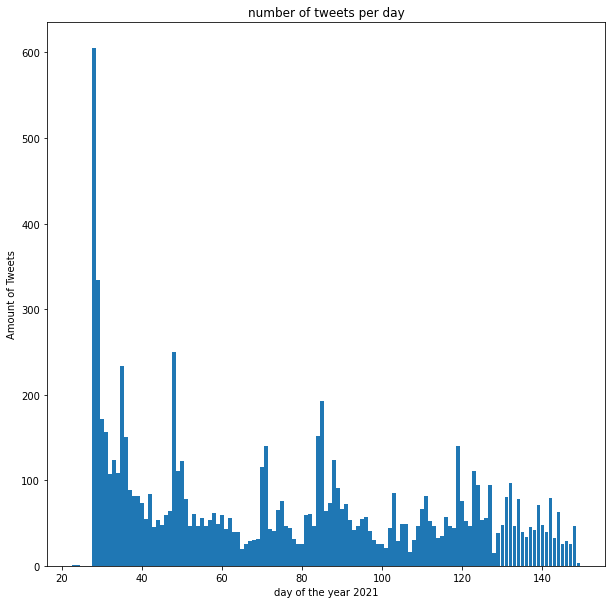

last day : 2021-05-29 02:37:38.935000


In [8]:
#time statistics 
dayofyear=[]
for i in list(notes.createdAtMillis) :
  dayofyear.append(pd.Timestamp(i, unit='ms').dayofyear)
data = dict([(n, dayofyear.count(n)) for n in set(dayofyear)])
plt.bar(data.keys(),list(data.values()))
plt.rcParams["figure.figsize"] = (10,10)
plt.ylabel("Amount of Tweets")
plt.xlabel("day of the year 2021")
plt.title("number of tweets per day")
plt.show()
print("last day :" , pd.Timestamp(max(notes.createdAtMillis), unit='ms'))

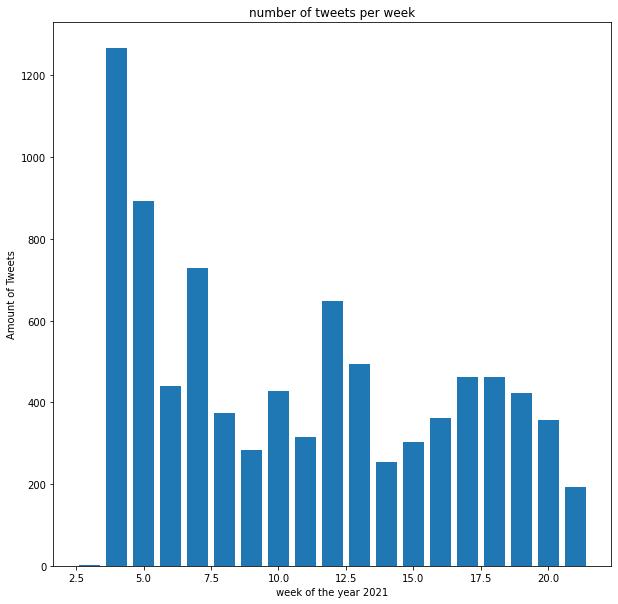

In [9]:
#time statistics 
weekofyear=[]
dates=[]
for i in list(notes.createdAtMillis) :
  weekofyear.append(pd.Timestamp(i, unit='ms').weekofyear)
data = dict([(n, weekofyear.count(n)) for n in set(weekofyear)])
plt.bar(data.keys(),list(data.values()))
plt.rcParams["figure.figsize"] = (10,10)
plt.ylabel("Amount of Tweets")
plt.xlabel("week of the year 2021")
plt.title("number of tweets per week")
plt.show()

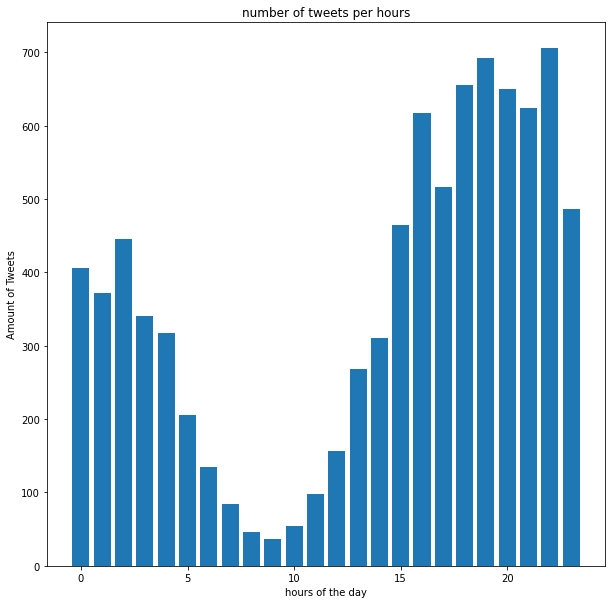

In [10]:
#time statistics 
hour=[]
for i in list(notes.createdAtMillis) :
  hour.append(pd.Timestamp(i, unit='ms').hour)
data = dict([(n, hour.count(n)) for n in set(hour)])
plt.bar(data.keys(),list(data.values()))
plt.rcParams["figure.figsize"] = (10,10)
plt.ylabel("Amount of Tweets")
plt.xlabel("hours of the day")
plt.title("number of tweets per hours")
plt.show()

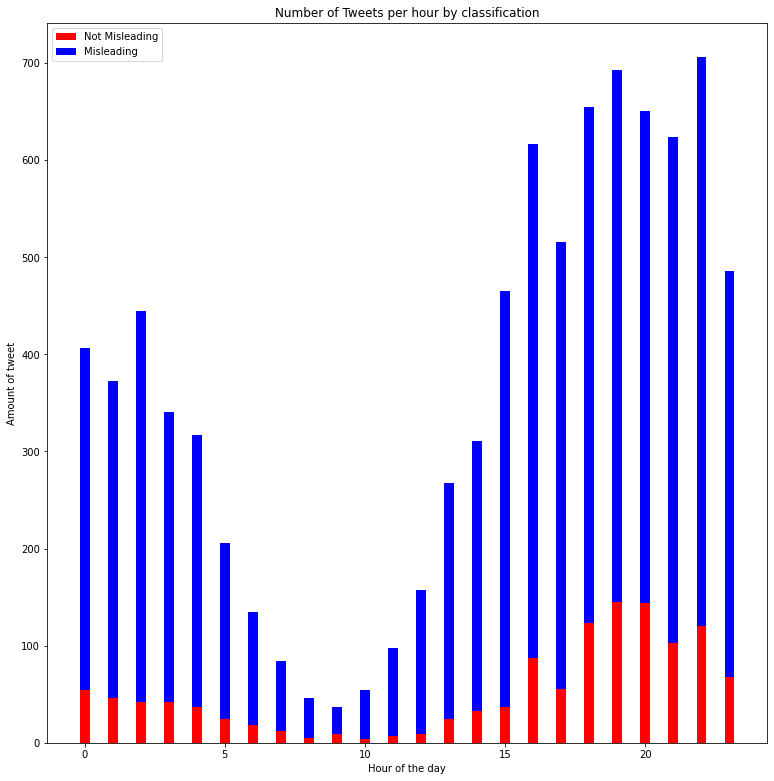

In [12]:
misleading=notes[notes["classification"]=='MISINFORMED_OR_POTENTIALLY_MISLEADING']
not_misleading=notes[notes["classification"]=='NOT_MISLEADING']
hour_misleading=[]
for i in list(misleading.createdAtMillis) :
  hour_misleading.append(pd.Timestamp(i, unit='ms').hour)
data_misleading = dict([(n, hour_misleading.count(n)) for n in set(hour_misleading)])
hour_not_misleading=[]
for i in list(not_misleading.createdAtMillis) :
  hour_not_misleading.append(pd.Timestamp(i, unit='ms').hour)
data_not_misleading = dict([(n, hour_not_misleading.count(n)) for n in set(hour_not_misleading)])

ind = np.arange(max(len(data_not_misleading),len(data_misleading))) # the x locations for the groups
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, list(data_not_misleading.values()), width, color='r')
ax.bar(ind, list(data_misleading.values()), width,bottom=list(data_not_misleading.values()), color='b')
ax.set_ylabel('Amount of tweet')
ax.set_xlabel('Hour of the day')
ax.set_title('Number of Tweets per hour by classification')
ax.legend(labels=['Not Misleading', 'Misleading'])
plt.show()

### Specific Tweets analysis

-----------------------------------------
Number of votes for this tweet:  61
majoritary classified:  MISINFORMED_OR_POTENTIALLY_MISLEADING with  57 votes
original Tweet: 
  I am happy to work with Republicans on this issue where there’s common ground, but you almost had me murdered 3 weeks ago so you can sit this one out.

Happy to work w/ almost any other GOP that aren’t trying to get me killed.

In the meantime if you want to help, you can resign. https://t.co/4mVREbaqqm


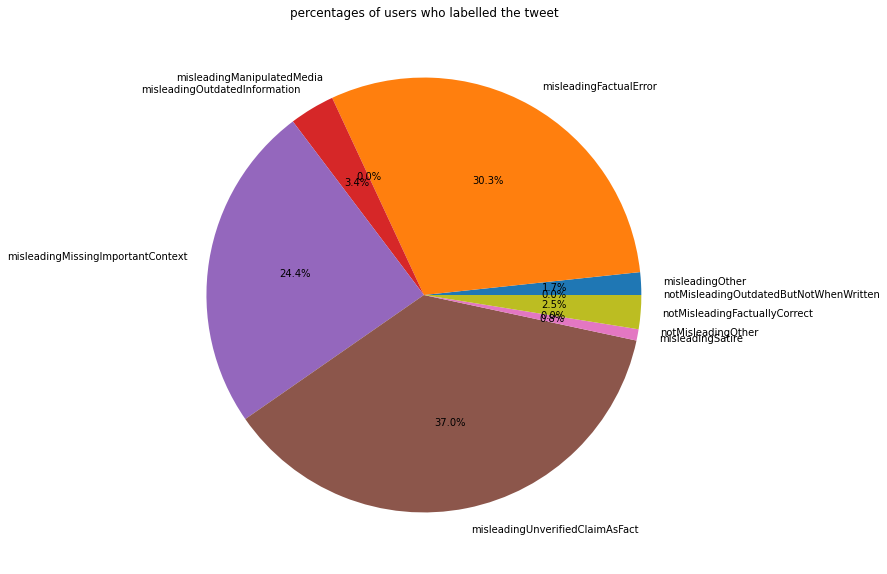

[2, 36, 0, 4, 29, 44, 1, 0, 3, 0] Index(['misleadingOther', 'misleadingFactualError',
       'misleadingManipulatedMedia', 'misleadingOutdatedInformation',
       'misleadingMissingImportantContext', 'misleadingUnverifiedClaimAsFact',
       'misleadingSatire', 'notMisleadingOther',
       'notMisleadingFactuallyCorrect',
       'notMisleadingOutdatedButNotWhenWritten'],
      dtype='object')
-----------------------------------------
Number of votes for this tweet:  22
majoritary classified:  MISINFORMED_OR_POTENTIALLY_MISLEADING with  22 votes
original Tweet: 
  This is the latest manipulative take on the right.

They are manipulating the fact that most people don’t know the layout the Capitol complex.

We were all on the Capitol complex - the attack wasn’t just on the dome.

The bombs Trump supporters planted surrounded our offices too. https://t.co/jI18e0XRrd


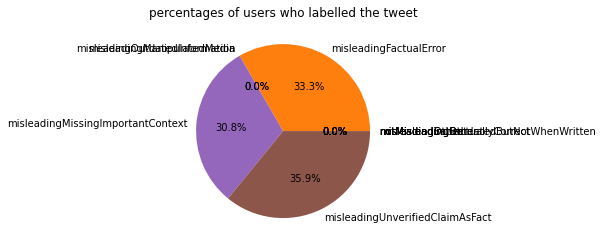

[0, 13, 0, 0, 12, 14, 0, 0, 0, 0] Index(['misleadingOther', 'misleadingFactualError',
       'misleadingManipulatedMedia', 'misleadingOutdatedInformation',
       'misleadingMissingImportantContext', 'misleadingUnverifiedClaimAsFact',
       'misleadingSatire', 'notMisleadingOther',
       'notMisleadingFactuallyCorrect',
       'notMisleadingOutdatedButNotWhenWritten'],
      dtype='object')
-----------------------------------------
Number of votes for this tweet:  15
majoritary classified:  MISINFORMED_OR_POTENTIALLY_MISLEADING with  14 votes
original Tweet: 
  On a day in which #AlexandriaOcasioSmollett is trending, please never forget the time that @AOC staged a photo shoot dressed in all white at a parking lot to spread lies about immigrant children in cages. 

Faking her own attempted murder was the next logical step. https://t.co/y8mNNowMGy


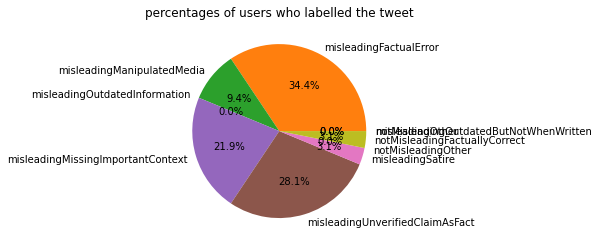

[0, 11, 3, 0, 7, 9, 1, 0, 1, 0] Index(['misleadingOther', 'misleadingFactualError',
       'misleadingManipulatedMedia', 'misleadingOutdatedInformation',
       'misleadingMissingImportantContext', 'misleadingUnverifiedClaimAsFact',
       'misleadingSatire', 'notMisleadingOther',
       'notMisleadingFactuallyCorrect',
       'notMisleadingOutdatedButNotWhenWritten'],
      dtype='object')
-----------------------------------------
Number of votes for this tweet:  12
majoritary classified:  NOT_MISLEADING with  11 votes
original Tweet: 
  I don't think this even matters at this point. Time magazine just came out said that a cabal of elites rigged the election

I'm sorry they said they didn't rig the election they "fortified" it, by changing the rules and laws as well as manipulating the flow of information https://t.co/1RO1tjbifv


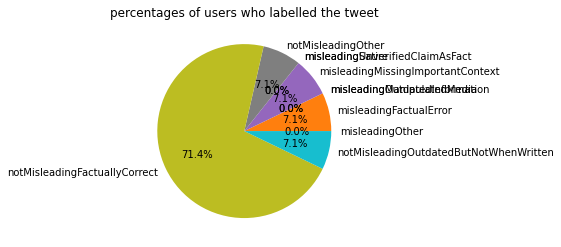

[0, 1, 0, 0, 1, 0, 0, 1, 10, 1] Index(['misleadingOther', 'misleadingFactualError',
       'misleadingManipulatedMedia', 'misleadingOutdatedInformation',
       'misleadingMissingImportantContext', 'misleadingUnverifiedClaimAsFact',
       'misleadingSatire', 'notMisleadingOther',
       'notMisleadingFactuallyCorrect',
       'notMisleadingOutdatedButNotWhenWritten'],
      dtype='object')
-----------------------------------------
Number of votes for this tweet:  13
majoritary classified:  MISINFORMED_OR_POTENTIALLY_MISLEADING with  13 votes
original Tweet: 
  Antifa and BLM attack DC like they helped organize the January 6 attack on Congress. However, so far their role is being concealed.


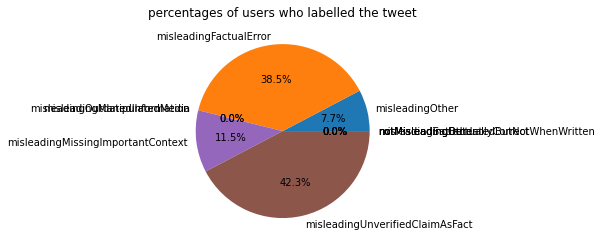

[2, 10, 0, 0, 3, 11, 0, 0, 0, 0] Index(['misleadingOther', 'misleadingFactualError',
       'misleadingManipulatedMedia', 'misleadingOutdatedInformation',
       'misleadingMissingImportantContext', 'misleadingUnverifiedClaimAsFact',
       'misleadingSatire', 'notMisleadingOther',
       'notMisleadingFactuallyCorrect',
       'notMisleadingOutdatedButNotWhenWritten'],
      dtype='object')
-----------------------------------------
Number of votes for this tweet:  23
majoritary classified:  MISINFORMED_OR_POTENTIALLY_MISLEADING with  23 votes


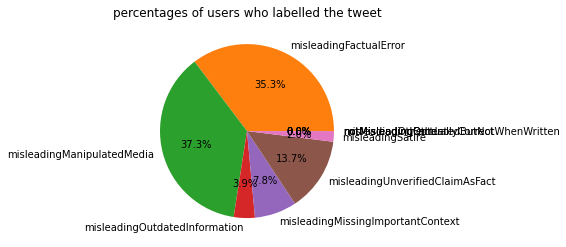

[0, 18, 19, 2, 4, 7, 1, 0, 0, 0] Index(['misleadingOther', 'misleadingFactualError',
       'misleadingManipulatedMedia', 'misleadingOutdatedInformation',
       'misleadingMissingImportantContext', 'misleadingUnverifiedClaimAsFact',
       'misleadingSatire', 'notMisleadingOther',
       'notMisleadingFactuallyCorrect',
       'notMisleadingOutdatedButNotWhenWritten'],
      dtype='object')
-----------------------------------------
Number of votes for this tweet:  12
majoritary classified:  MISINFORMED_OR_POTENTIALLY_MISLEADING with  12 votes
original Tweet: 
  Today’s center of the #COVIDIOTS universe is Miami Beach, Florida. https://t.co/Wo8JeNfDFa


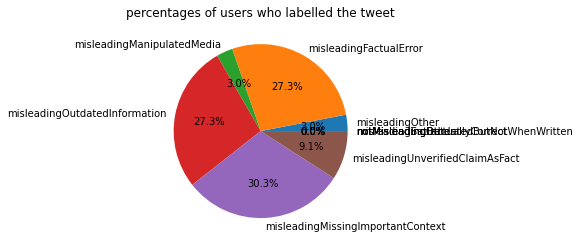

[1, 9, 1, 9, 10, 3, 0, 0, 0, 0] Index(['misleadingOther', 'misleadingFactualError',
       'misleadingManipulatedMedia', 'misleadingOutdatedInformation',
       'misleadingMissingImportantContext', 'misleadingUnverifiedClaimAsFact',
       'misleadingSatire', 'notMisleadingOther',
       'notMisleadingFactuallyCorrect',
       'notMisleadingOutdatedButNotWhenWritten'],
      dtype='object')
-----------------------------------------
Number of votes for this tweet:  11
majoritary classified:  MISINFORMED_OR_POTENTIALLY_MISLEADING with  11 votes
original Tweet: 
  An angry mob attacked our Capitol, our lawmakers, and our election. 

They killed a policeman. 

And Republican leaders would rather we all not know more about what happened.


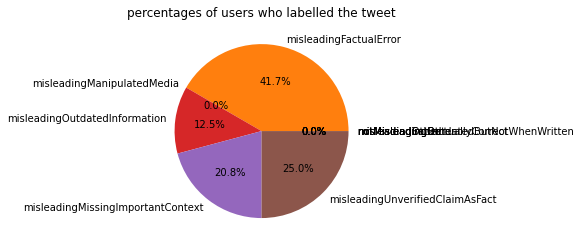

[0, 10, 0, 3, 5, 6, 0, 0, 0, 0] Index(['misleadingOther', 'misleadingFactualError',
       'misleadingManipulatedMedia', 'misleadingOutdatedInformation',
       'misleadingMissingImportantContext', 'misleadingUnverifiedClaimAsFact',
       'misleadingSatire', 'notMisleadingOther',
       'notMisleadingFactuallyCorrect',
       'notMisleadingOutdatedButNotWhenWritten'],
      dtype='object')


In [13]:
#1 votes per tweets
tweet=notes.groupby('tweetId')
for t in tweet :
 if len(t[1])>10:
   print("-----------------------------------------")
   print('Number of votes for this tweet: ' , len(t[1]))
   df=pd.DataFrame(t[1], index=None)
   print("majoritary classified: " , df.classification.value_counts().index[0] , "with " ,df.classification.value_counts()[0], "votes" )
   if max(df.tweetId) in list(json.id) :
     print( "original Tweet: \n ", max(json[json["id"]==max(df.tweetId)].full_text))
   votes_labels=df.columns[8:-4] #only collect the votes label
   votes_sum=[]
   for i in votes_labels : 
     votes_sum.append(df[i].sum())
   plt.pie(votes_sum, labels=votes_labels, autopct='%1.1f%%')
   plt.rcParams["figure.figsize"] = (4,4)
   plt.title( "percentages of users who labelled the tweet")
   plt.show() 
   print(votes_sum,votes_labels)


In [14]:
#number of tweets that have been labelled by more than one person.
tweet=notes.groupby('tweetId')

more1=len(tweet.filter(lambda p :  (p.participantId).count()>1).tweetId.value_counts())
more5=len(tweet.filter(lambda p :  (p.participantId).count()>5).tweetId.value_counts())

print("number of tweets that have been labelled by more than one paticipant : ", more1)
print("number of tweets that have been labelled by more than 5 paticipant : ", more5)
print("number total of tweets : " , len(tweet))

number of tweets that have been labelled by more than one paticipant :  958
number of tweets that have been labelled by more than 5 paticipant :  52
number total of tweets :  6886


number of tweets :  61


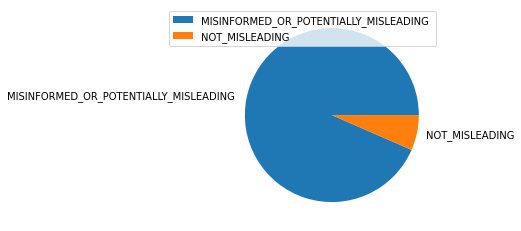

number of tweets :  22


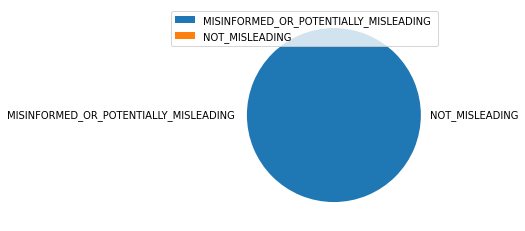

number of tweets :  15


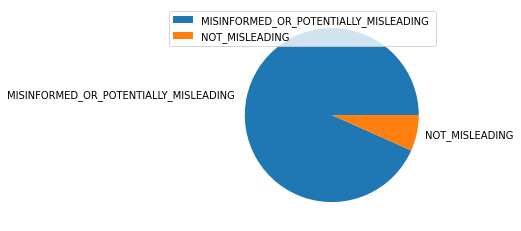

number of tweets :  12


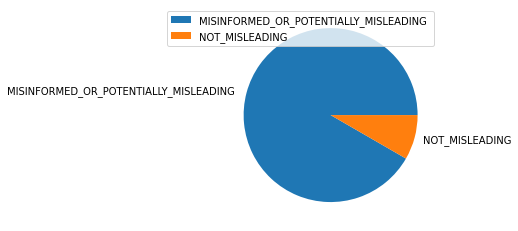

number of tweets :  13


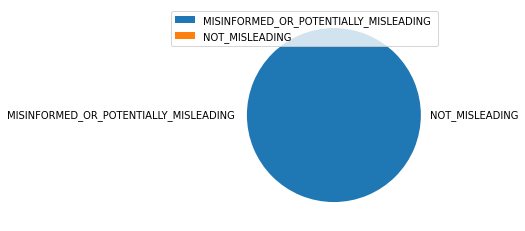

number of tweets :  23


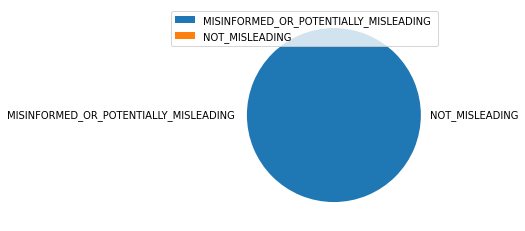

number of tweets :  12


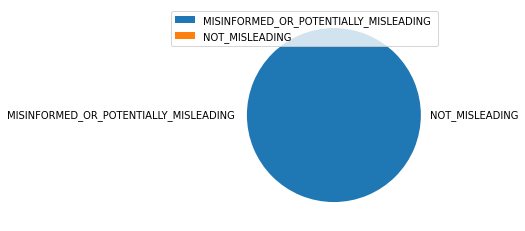

number of tweets :  11


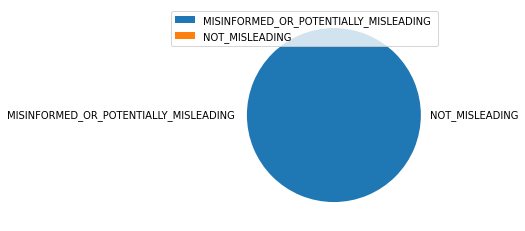

In [15]:
# classifaction per tweet
for p in tweet :
 if len(p[1])>10:
   df=pd.DataFrame(p[1], index=None)
   l=df['classification'].value_counts()
   print("number of tweets : " , len(df))
   plt.pie([l[0], len(df)-l[0]], labels=['MISINFORMED_OR_POTENTIALLY_MISLEADING ', 'NOT_MISLEADING'])
   plt.legend()
   plt.show() 


In [19]:
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('max_seq_item', None)
pd.set_option('max_colwidth', None)
tweet=notes.groupby('tweetId')
for t in tweet :
 if len(t[1])>20:
   
   print('---------------------- \n number of votes for this tweet: ' , len(t[1]))
   df=pd.DataFrame(t[1], index=None)
   if max(df.tweetId) in list(json.id) :
     print( "original Tweet: \n ", max(json[json["id"]==max(df.tweetId)].full_text))

   display(df[['summary', 'classification', 'believable', 'true_summary']])
   print(pd.crosstab(df['classification'],df['believable']))
   print(pd.crosstab(df['true_summary'], df['believable']))

---------------------- 
 number of votes for this tweet:  61
original Tweet: 
  I am happy to work with Republicans on this issue where there’s common ground, but you almost had me murdered 3 weeks ago so you can sit this one out.

Happy to work w/ almost any other GOP that aren’t trying to get me killed.

In the meantime if you want to help, you can resign. https://t.co/4mVREbaqqm


,summary,classification,believable,true_summary
1002,Ted Cruz did not try to have Alexandria Ocasio-Cortez murdered.,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,False
1433,Ted Cruz had nothing to do with LARPers running around in the capitol.,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,False
1444,Senator Cruz did not attempt to have this Representative murdered. This is false,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,False
1533,"While what caused the &quot;insurrection&quot; is unknown, Sen Cruz in no way advocated for the murder of Rep Ocasio-Cortez. It's disingenuous and borders on slander/libel.",MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,False
1541,"Ted Cruz did not try to have anyone murdered, nor did the Republicans.",MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_FEW,False
...,...,...,...,...
8010,&commat;aoc was not almost murdered as she claims.,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,False
8240,Investigation into the incident is still ongoing.,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,False
8319,"This post does not cite any sources, but there is a capital police investigation where evidence does not need to be presented to the public. Other GOP reps have threatened her. I believe this is why she posted this tweet. https://www.msn.com/en-us/news/us/feds-texas-man-charged-in-capitol-riots-threatened-to-kill-aoc/ar-BB1d1OJM",NOT_MISLEADING,NOT AVAILABLE,True
8336,Ted Cruz did not attempt to murder Alexandria-Ocasio Cortez. This tweet is hyperbole and not a statement to fact.,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_FEW,False


believable                             BELIEVABLE_BY_FEW  BELIEVABLE_BY_MANY  \
classification                                                                 
MISINFORMED_OR_POTENTIALLY_MISLEADING                  3                  54   
NOT_MISLEADING                                         0                   0   

believable                             NOT AVAILABLE  
classification                                        
MISINFORMED_OR_POTENTIALLY_MISLEADING              0  
NOT_MISLEADING                                     4  
believable    BELIEVABLE_BY_FEW  BELIEVABLE_BY_MANY  NOT AVAILABLE
true_summary                                                      
False                         3                  49              0
True                          0                   5              4
---------------------- 
 number of votes for this tweet:  22
original Tweet: 
  This is the latest manipulative take on the right.

They are manipulating the fact that most people don’t know 

,summary,classification,believable,true_summary
1072,The FBI has yet to identify a suspect who placed bombs at the DNC &amp; RNC. https://amp.cnn.com/cnn/2021/01/29/politics/washington-pipe-bombs-dnc-rnc/index.html,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,True
1682,There has been zero factual evidence to support the claim that bombs were planted by Trump supporters.,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,False
2674,&quot;The bombs Trump supporters planted surrounded our offices too.&quot; This tweet irresponsibly attributes the placing of bombs to Trump supporters when law enforcement hasn't even indicated they know who it was. Intentionally misdirecting blame on a group of people.,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,False
2890,"https://www.fbi.gov/wanted/seeking-info/suspected-pipe-bombs-in-washington-dc It is not yet determined who planted the pipe bombs at the RNC and DNC headquarters, nor their political affiliations.",MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,True
2953,The FBI has not yet identified who planted the bombs at both the RNC and the DNC.,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,False
3077,There has been no proof that corroborates AOC?s statement that the bombs were planted by a Trumbo supporter,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,False
3222,Bombs were not planted at the Capitol or adjacent office buildings. https://www.cnn.com/2021/01/29/politics/washington-pipe-bombs-dnc-rnc/index.html,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,True
3996,"The person who planted the pipe bombs hasn't been found and there is ZERO evidence it was a Trump supporter. Also the primary dome that was infiltrated, AOC was NOT in that dome. This blatant form of misinformation.",MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,False
4055,Her tweet attributes the planting of bombs by ?Trump people?. This is opinion and has no factual basis according to reports from law enforcement who has yet to determine the origins of any explosives,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,False
4222,There is no law enforcement investigation charging ?Trump supporters? with planting bombs all around congressional offices. The FBI hasn?t even identified a suspect yet. https://www.latimes.com/world-nation/story/2021-01-29/fbi-pipe-bombs-at-rnc-dnc-were-planted-night-before-riot,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,True


believable                             BELIEVABLE_BY_MANY
classification                                           
MISINFORMED_OR_POTENTIALLY_MISLEADING                  22
believable    BELIEVABLE_BY_MANY
true_summary                    
False                         11
True                          11
---------------------- 
 number of votes for this tweet:  23


,summary,classification,believable,true_summary
120,The tweet has been debunked. https://www.cnn.com/2021/02/19/politics/fact-check-cruz-texas-freezes-over-fake-tweet/index.html,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,True
1014,This is not a real tweet.,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,False
1126,"It is not, in fact, a real Tweet.",MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,False
1163,"According to snopes.com, the tweet from Cruz is not real. There is no evidence of the tweet in his archived history. https://www.snopes.com/fact-check/ted-cruz-texas-freezes-over/",MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,True
2142,This tweet contains an image of a tweet alleging to be from Sen. Ted Cruz. The tweet is fake and has been debunked by numerous fact-checkers as such.,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,False
2379,https://www.snopes.com/fact-check/ted-cruz-texas-freezes-over/,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,True
2431,The account owner said himself that it is not real but refused to take down the original https://twitter.com/rezaaslan/status/1362812228055961600?s=19,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,True
2442,The screenshot shared and proclaimed as real is in fact a fake tweet.,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,False
2584,This tweet contains an altered screenshot of a Ted Cruz tweet. https://www.cnn.com/2021/02/19/politics/fact-check-cruz-texas-freezes-over-fake-tweet/index.html,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,True
2732,"There is no evidence that Ted Cruz tweeted this and it is very likely a falsified image. A search on WebArchive from Sept 9, 2016 does not show the tweet: https://web.archive.org/web/20160909115522/twitter.com/tedcruz Neither does a search of Ted Cruz's Twitter account: https://www.reuters.com/article/uk-factcheck-fake-tweet-ted-cruz/fact-check-ill-believe-in-climate-change-when-texas-freezes-over-ted-cruz-tweet-appears-to-be-fabricated-idUSKBN2AJ2HH",MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,True


believable                             BELIEVABLE_BY_MANY
classification                                           
MISINFORMED_OR_POTENTIALLY_MISLEADING                  23
believable    BELIEVABLE_BY_MANY
true_summary                    
False                         16
True                           7


### Participant analysis

participantId :  06C7B658C5B6735445616F768A6A8528
number of tweets for this participant:  164
Summary considered as : 
 True     160
False      4
Name: true_summary, dtype: int64


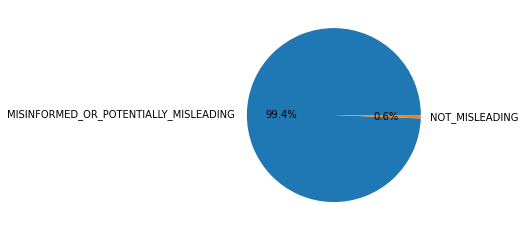

participantId :  0709C22A264320253D219D21DF3AA5B3
number of tweets for this participant:  102
Summary considered as : 
 True     62
False    40
Name: true_summary, dtype: int64


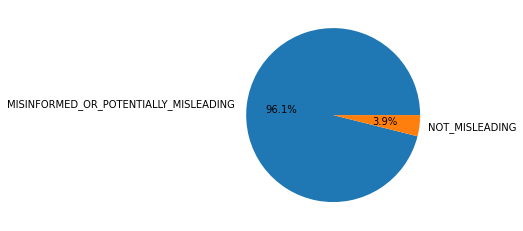

participantId :  3280545D607EB56DF3C31042F9397E2C
number of tweets for this participant:  120
Summary considered as : 
 True     107
False     13
Name: true_summary, dtype: int64


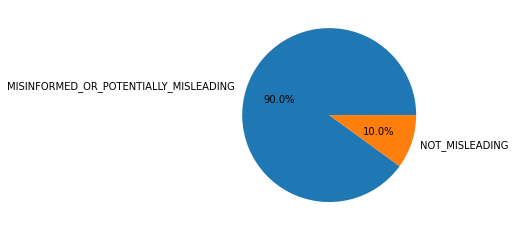

participantId :  785F608A49A333D59696479B96A0FE49
number of tweets for this participant:  226
Summary considered as : 
 True     138
False     88
Name: true_summary, dtype: int64


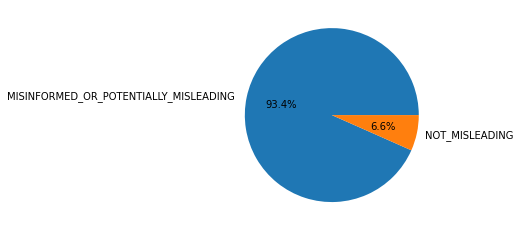

participantId :  7FC8E5C1761E00B8B7C27C7249834934
number of tweets for this participant:  209
Summary considered as : 
 True     208
False      1
Name: true_summary, dtype: int64


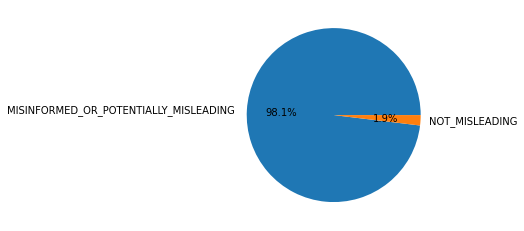

participantId :  8B903B14E301B4BFF4E2E41F05146CDD
number of tweets for this participant:  697
Summary considered as : 
 True    697
Name: true_summary, dtype: int64


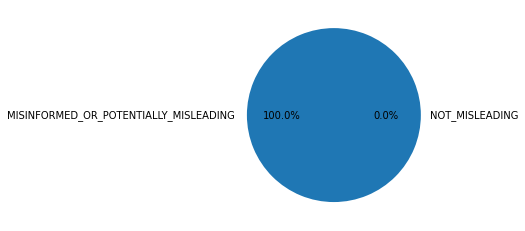

participantId :  AECA621BD49DBD17B585EFF22D682450
number of tweets for this participant:  101
Summary considered as : 
 False    79
True     22
Name: true_summary, dtype: int64


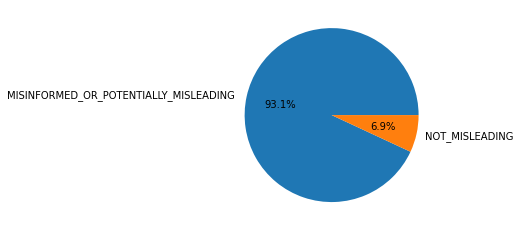

In [ ]:
#2 votes per participant
participant=notes.groupby('participantId')
for p in participant :
 if len(p[1])>100:
   df=pd.DataFrame(p[1], index=None)
   l=df['classification'].value_counts()
   print("participantId : ", p[0])
   print("number of tweets for this participant: " , len(df))
   print("Summary considered as : \n" , df.true_summary.value_counts())
   plt.pie([l[0], len(df)-l[0]], labels=['MISINFORMED_OR_POTENTIALLY_MISLEADING ', 'NOT_MISLEADING'], autopct='%1.1f%%')
   #plt.legend()
   plt.show() 

 

In [ ]:
notes.participantId.value_counts()

8B903B14E301B4BFF4E2E41F05146CDD    697
785F608A49A333D59696479B96A0FE49    226
7FC8E5C1761E00B8B7C27C7249834934    209
06C7B658C5B6735445616F768A6A8528    164
3280545D607EB56DF3C31042F9397E2C    120
                                   ... 
9C55C53FBA17585BF73A18B5F19B1739      1
CC781C8294F34E4D2B9D62508D27C2F5      1
CF3B56519B021F60584B7A5D6FB055A1      1
6A5422DD69370A2EF4347DD1394FAA39      1
A4A23D607EAA8E660973A0156E1DD616      1
Name: participantId, Length: 1703, dtype: int64

### Ratings analysis

In [20]:
ratings=pd.read_csv(path+"/ratings-00000.tsv",sep='\t')
ratings= ratings.fillna("NOT AVAILABLE")

In [21]:
ratings.describe()

,noteId,createdAtMillis,agree,disagree,helpful,notHelpful,helpfulOther,helpfulInformative,helpfulClear,helpfulEmpathetic,helpfulGoodSources,helpfulUniqueContext,notHelpfulOther,notHelpfulIncorrect,notHelpfulSourcesMissingOrUnreliable,notHelpfulOpinionSpeculationOrBias,notHelpfulMissingKeyPoints,notHelpfulOutdated,notHelpfulHardToUnderstand,notHelpfulArgumentativeOrInflammatory,notHelpfulOffTopic,notHelpfulSpamHarassmentOrAbuse
count,2.439600e+04,2.439600e+04,24396.000000,24396.000000,24396.000000,24396.000000,24396.000000,24396.000000,24396.000000,24396.000000,24396.000000,24396.000000,24396.000000,24396.000000,24396.000000,24396.000000,24396.000000,24396.000000,24396.000000,24396.000000,24396.000000,24396.000000
mean,1.371556e+18,1.615914e+12,0.667036,0.232661,0.653181,0.331284,0.027054,0.413715,0.325504,0.189990,0.299393,0.153468,0.023774,0.058452,0.127193,0.150189,0.100016,0.010698,0.023938,0.087145,0.038982,0.017749
std,1.347940e+16,3.212276e+09,0.471284,0.422537,0.475967,0.470685,0.162243,0.492509,0.468573,0.392301,0.458002,0.360445,0.152349,0.234601,0.333196,0.357263,0.300028,0.102881,0.152860,0.282054,0.193556,0.132040
min,1.352797e+18,1.611388e+12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.357785e+18,1.612643e+12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.370633e+18,1.615748e+12,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.383883e+18,1.618861e+12,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.398469e+18,1.622257e+12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
ratings.head()

,noteId,participantId,createdAtMillis,agree,disagree,helpful,notHelpful,helpfulOther,helpfulInformative,helpfulClear,helpfulEmpathetic,helpfulGoodSources,helpfulUniqueContext,notHelpfulOther,notHelpfulIncorrect,notHelpfulSourcesMissingOrUnreliable,notHelpfulOpinionSpeculationOrBias,notHelpfulMissingKeyPoints,notHelpfulOutdated,notHelpfulHardToUnderstand,notHelpfulArgumentativeOrInflammatory,notHelpfulOffTopic,notHelpfulSpamHarassmentOrAbuse
0,1352796878438424576,7644DF3FD853416F0C96933CCC1BA9B7,1611796572477,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,1352796878438424576,7585B8804A32416E91E51837F351F249,1611388222120,1,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,1352796878438424576,EFD7E04E740224D2DDB42A2C910B62C1,1611852744990,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1352796878438424576,3C9A15EEA8FD238754BE28C15B26709A,1611673955881,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1352796878438424576,628C786C63B5A4D32E13C6C442E1863D,1611623203338,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
agree=ratings[ratings.agree==1].groupby(ratings.noteId).count().sort_values(by="agree",ascending=False).noteId
d={'noteId' : list(agree.index) , 'numberAgree' : agree.values}
agree=pd.DataFrame(d)

In [ ]:
agree=agree.merge(notes, right_on = 'noteId', left_on = 'noteId', how='inner')
agree["full_text"]=["NOT AVAILABLE" for i in range(len(agree))]
agree["other_notes"]=[list() for i in range(len(agree))]
for i in range(len(agree)) :
  if agree.tweetId[i] in list(json.id) :
    text=max(json[json["id"]==agree.tweetId[i]].full_text)
    agree["full_text"][i]=text
  if agree.tweetId[i] in list(notes.tweetId) :
    agree["other_notes"][i]= list(notes[notes["tweetId"]==agree.tweetId[i]].noteId)
    

In [ ]:
agree.head(15)

In [36]:
agree.to_csv(path+"/agree.csv")

In [40]:
disagree=ratings[ratings.disagree==1].groupby(ratings.noteId).count().sort_values(by="disagree",ascending=False).noteId
d={'noteId' : list(disagree.index) , 'numberDisagree' : disagree.values}
disagree=pd.DataFrame(d)


In [ ]:
disagree=disagree.merge(notes, right_on = 'noteId', left_on = 'noteId', how='inner')
disagree["full_text"]=["NOT AVAILABLE" for i in range(len(disagree))]
disagree["other_notes"]=[list() for i in range(len(disagree))]
for i in range(len(disagree)) :
  if disagree.tweetId[i] in list(json.id) :
    text=max(json[json["id"]==disagree.tweetId[i]].full_text)
    disagree["full_text"][i]=text
  if disagree.tweetId[i] in list(notes.tweetId) :
    disagree["other_notes"][i]= list(notes[notes["tweetId"]==disagree.tweetId[i]].noteId)

In [ ]:
disagree.head(15)

,noteId,numberDisagree,participantId,createdAtMillis,tweetId,classification,believable,harmful,validationDifficulty,misleadingOther,misleadingFactualError,misleadingManipulatedMedia,misleadingOutdatedInformation,misleadingMissingImportantContext,misleadingUnverifiedClaimAsFact,misleadingSatire,notMisleadingOther,notMisleadingFactuallyCorrect,notMisleadingOutdatedButNotWhenWritten,notMisleadingClearlySatire,notMisleadingPersonalOpinion,trustworthySources,summary,full_text,other_notes
0,1354889887950860289,25,140315D129F16209E54F89CC70AFF07F,1611865896582,1354848253729234944,NOT_MISLEADING,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,0,0,0,0,0,0,0,0,1,0,0,1,1,"The Capitol rioters saw Ted Cruz as their leader, commenting on video during the incident that Cruz would want them to do that. The goal of the zip tie guy was to use the zip ties on elected members of Congress, like AOC. https://abc13.com/ted-cruz-the-new-yorker-video-senator-capitol-riots-trump-mob/9760435/","I am happy to work with Republicans on this issue where there’s common ground, but you almost had me murdered 3 weeks ago so you can sit this one out.\n\nHappy to work w/ almost any other GOP that aren’t trying to get me killed.\n\nIn the meantime if you want to help, you can resign. https://t.co/4mVREbaqqm","[1354862521111470083, 1354875505246351360, 1354864965916614656, 1354875060885090309, 1354928574734733315, 1354974048610963459, 1354872113895772160, 1354972085530013697, 1354949447965233172, 1354956296123002890, 1354878293590200320, 1354877986068193296, 1357798998405447682, 1354889152840364032, 1354868783840595969, 1354893429977849861, 1354865394264264706, 1354955831163432965, 1354865781314637825, 1355723801720483842, 1354856908969168903, 1354874883348570116, 1354874966781657090, 1354889733000867843, 1354862274394157056, 1354867310088085506, 1354914757975928838, 1354864022290624517, 1354961584897011725, 1354946548912828418, 1354921376042410007, 1354859563456094220, 1355206319016296451, 1354955055833743367, 1354863238236745730, 1354878458753654787, 1354987306864828421, 1354919577734402050, 1354863653435002881, 1354864175789584384, 1354860855079428102, 1354855105779142664, 1354889887950860289, 1354888271600492548, 1354865342229655552, 1354868949721071616, 1354855204005453826, 1354899975608655872, 1354862350009069568, 1354885480710463489, 1354864556552712194, 1354855483631423493, 1354850505164550145, 1355133277238124546, 1355523958616055809, 1354895525879885825, 1354885895623749632, 1354994607852048385, 1354869505760096261, 1354856852564144128, 1354885178079014916]"
1,1354869505760096261,23,DF91BEB92340565191EBFB733778AD6B,1611861037090,1354848253729234944,NOT_MISLEADING,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,0,0,0,0,0,0,0,0,0,0,0,1,1,"This post does not cite any sources, but there is a capital police investigation where evidence does not need to be presented to the public. Other GOP reps have threatened her. I believe this is why she posted this tweet. https://www.msn.com/en-us/news/us/feds-texas-man-charged-in-capitol-riots-threatened-to-kill-aoc/ar-BB1d1OJM","I am happy to work with Republicans on this issue where there’s common ground, but you almost had me murdered 3 weeks ago so you can sit this one out.\n\nHappy to work w/ almost any other GOP that aren’t trying to get me killed.\n\nIn the meantime if you want to help, you can resign. https://t.co/4mVREbaqqm","[1354862521111470083, 1354875505246351360, 1354864965916614656, 1354875060885090309, 1354928574734733315, 1354974048610963459, 1354872113895772160, 1354972085530013697, 1354949447965233172, 1354956296123002890, 1354878293590200320, 1354877986068193296, 1357798998405447682, 1354889152840364032, 1354868783840595969, 1354893429977849861, 1354865394264264706, 1354955831163432965, 1354865781314637825, 1355723801720483842, 1354856908969168903, 1354874883348570116, 1354874966781657090, 1354889733000867843, 1354862274394157056, 1354867310088085506, 1354914757975928838, 1354864022290624517, 1354961584897011725,

In [42]:
disagree.to_csv(path+"/disagree.csv")

In [43]:
noteId=ratings.groupby('noteId')
diff={}
agree_counts={}
disagree_counts={}
for id in noteId :
  df=pd.DataFrame(id[1], index=None)
  a=df['agree'].sum()
  d=df['disagree'].sum()
  agree_counts[id[0]]=a
  disagree_counts[id[0]]=d
  diff[id[0]]=abs(a-d)

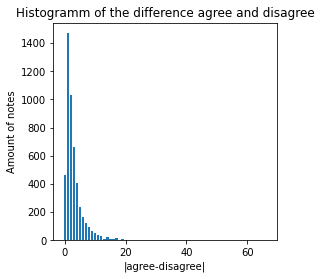

In [44]:
r=list(diff.values())
data = dict([(n, r.count(n)) for n in set(r)])
plt.bar(data.keys(),list(data.values()))
plt.rcParams["figure.figsize"] = (5,10)
plt.ylabel("Amount of notes")
plt.xlabel("|agree-disagree|")
plt.title("Histogramm of the difference agree and disagree")
plt.show()


In [45]:
full_notes=pd.read_csv(path+'/updated_notes.tsv')

___________________
number of agree/ disagree : 10
notes summary :  AOC was not involved in a direct or indirect attempt to be killed.
tweet :  I am happy to work with Republicans on this issue where there’s common ground, but you almost had me murdered 3 weeks ago so you can sit this one out.

Happy to work w/ almost any other GOP that aren’t trying to get me killed.

In the meantime if you want to help, you can resign. https://t.co/4mVREbaqqm
tweet noted as  MISINFORMED_OR_POTENTIALLY_MISLEADING
number of other notes related to this tweet :  61 [1354862521111470083, 1354875505246351360, 1354864965916614656, 1354875060885090309, 1354928574734733315, 1354974048610963459, 1354872113895772160, 1354972085530013697, 1354949447965233172, 1354956296123002890, 1354878293590200320, 1354877986068193296, 1357798998405447682, 1354889152840364032, 1354868783840595969, 1354893429977849861, 1354865394264264706, 1354955831163432965, 1354865781314637825, 1355723801720483842, 1354856908969168903, 13548

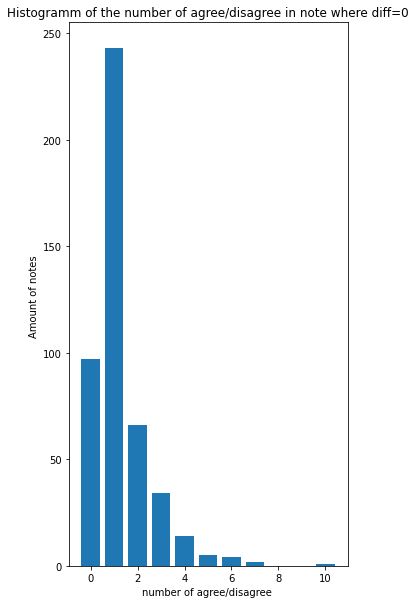

In [46]:
#let's look at notes where there are as much agree that disagree
diff0=[]
for id,value in diff.items() :
  if value==0 :
    diff0.append(agree_counts[id])
    if agree_counts[id]> 6 :
      print("___________________")
      print("number of agree/ disagree :", agree_counts[id])
      print("notes summary : ", full_notes[full_notes['noteId']==id].summary.item())
      print( "tweet : " ,  full_notes[full_notes['noteId']==id].full_text.item())
      print("tweet noted as ", full_notes[full_notes['noteId']==id].classification.item())
      l=disagree[disagree['noteId']==id].other_notes.item()
      print("number of other notes related to this tweet : " ,len(l), l)
data = dict([(n, diff0.count(n)) for n in set(diff0)])
plt.bar(data.keys(),list(data.values()))
plt.rcParams["figure.figsize"] = (5,5)
plt.ylabel("Amount of notes ")
plt.xlabel("number of agree/disagree ")
plt.title("Histogramm of the number of agree/disagree in note where diff=0")
plt.show()

___________________
number of agree: 11
number of disagree:  9
notes summary :  Says Ted Cruz called for violence when he never made that claim or asked for riots
tweet :  I am happy to work with Republicans on this issue where there’s common ground, but you almost had me murdered 3 weeks ago so you can sit this one out.

Happy to work w/ almost any other GOP that aren’t trying to get me killed.

In the meantime if you want to help, you can resign. https://t.co/4mVREbaqqm
tweet noted as  MISINFORMED_OR_POTENTIALLY_MISLEADING
number of other notes related to this tweet :  61 [1354862521111470083, 1354875505246351360, 1354864965916614656, 1354875060885090309, 1354928574734733315, 1354974048610963459, 1354872113895772160, 1354972085530013697, 1354949447965233172, 1354956296123002890, 1354878293590200320, 1354877986068193296, 1357798998405447682, 1354889152840364032, 1354868783840595969, 1354893429977849861, 1354865394264264706, 1354955831163432965, 1354865781314637825, 1355723801720483842

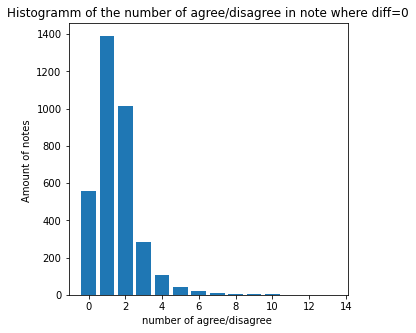

In [47]:
#let's look at notes where there are as much agree that disagree
diff1=[]
for id,value in diff.items() :
  if value<3 :
    diff0.append(agree_counts[id])
    if agree_counts[id]> 10 or disagree_counts[id] >10:
      print("___________________")
      print("number of agree:", agree_counts[id])
      print('number of disagree: ', disagree_counts[id])
      print("notes summary : ", full_notes[full_notes['noteId']==id].summary.item())
      print( "tweet : " ,  full_notes[full_notes['noteId']==id].full_text.item())
      print("tweet noted as ", full_notes[full_notes['noteId']==id].classification.item())
      l=disagree[disagree['noteId']==id].other_notes.item()
      print("number of other notes related to this tweet : " ,len(l), l)
data = dict([(n, diff0.count(n)) for n in set(diff0)])
plt.bar(data.keys(),list(data.values()))
plt.rcParams["figure.figsize"] = (5,5)
plt.ylabel("Amount of notes ")
plt.xlabel("number of agree/disagree ")
plt.title("Histogramm of the number of agree/disagree in note where diff=0")
plt.show()

___________________
1354864556552712194
number of agree/ disagree : 48 / 8


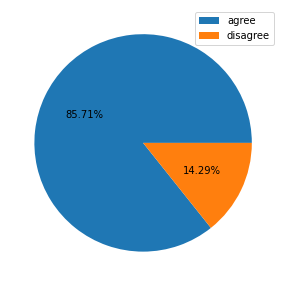

notes summary :  While I can understand AOC being worried she may have been hurt by the Capitol Protesters she cannot claim Ted Cruz tried to have her killed without providing proof. That's dangerous misinformation by falsely accusing Ted Cruz of a serious crime.
tweet :  I am happy to work with Republicans on this issue where there’s common ground, but you almost had me murdered 3 weeks ago so you can sit this one out.

Happy to work w/ almost any other GOP that aren’t trying to get me killed.

In the meantime if you want to help, you can resign. https://t.co/4mVREbaqqm
classified as :  MISINFORMED_OR_POTENTIALLY_MISLEADING
number of other notes related to this tweet :  61
___________________
1374925813125120000
number of agree/ disagree : 69 / 3


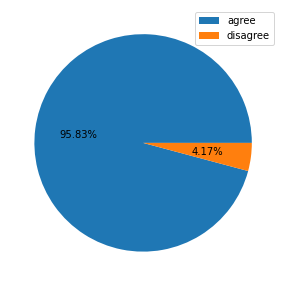

notes summary :  It has been reported that amazon employees pee in bottles while working https://www.independent.co.uk/news/uk/home-news/amazon-protests-workers-urinate-plastic-bottles-no-toilet-breaks-milton-keynes-jeff-bezos-a9012351.html
tweet :  @repmarkpocan 1/2 You don’t really believe the peeing in bottles thing, do you? If that were true, nobody would work for us. The truth is that we have over a million incredible employees around the world who are proud of what they do, and have great wages and health care from day one.
classified as :  MISINFORMED_OR_POTENTIALLY_MISLEADING
number of other notes related to this tweet :  9
___________________
1374969556335095808
number of agree/ disagree : 55 / 2


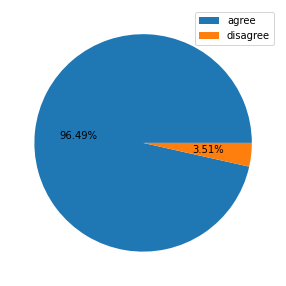

notes summary :  This tweet ignores testimony from worker surveys and an undercover journalist. See:    https://www.theverge.com/2018/4/16/17243026/amazon-warehouse-jobs-worker-conditions-bathroom-breaks    https://static1.squarespace.com/static/5a3af3e22aeba594ad56d8cb/t/5ad098b3562fa7b8c90d5e1b/1523620020369/Amazon+Warehouse+Staff+Survey+Results.pdf
tweet :  @repmarkpocan 1/2 You don’t really believe the peeing in bottles thing, do you? If that were true, nobody would work for us. The truth is that we have over a million incredible employees around the world who are proud of what they do, and have great wages and health care from day one.
classified as :  MISINFORMED_OR_POTENTIALLY_MISLEADING
number of other notes related to this tweet :  9
___________________
1375058804929335300
number of agree/ disagree : 64 / 2


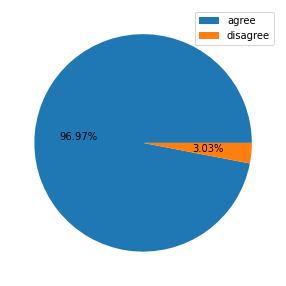

notes summary :  Amazon has a documented history of labor violations, including pushing employees to work so much they do not have time to use the restroom.   https://www.theguardian.com/technology/2020/feb/05/amazon-workers-protest-unsafe-grueling-conditions-warehouse    https://www.newsweek.com/amazon-drivers-warehouse-conditions-workers-complains-jeff-bezos-bernie-1118849    https://www.npr.org/2020/07/31/897836765/amazon-workers-respond-to-jeff-bezos-testimony-before-congress
tweet :  @repmarkpocan 1/2 You don’t really believe the peeing in bottles thing, do you? If that were true, nobody would work for us. The truth is that we have over a million incredible employees around the world who are proud of what they do, and have great wages and health care from day one.
classified as :  MISINFORMED_OR_POTENTIALLY_MISLEADING
number of other notes related to this tweet :  9
___________________
1378486264110927877
number of agree/ disagree : 40 / 2


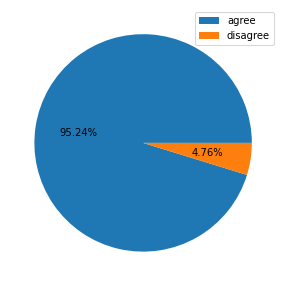

notes summary :  None of those companies would like him more or less if he was Chinese or not.  Also given the recent context of the killings of several asian women, this tweet is particularly harmful to several communities.  This has no place this platform.
tweet :  I’ve decided to “identify” as Chinese. Coke will like me, Delta will agree with my “values” and I’ll probably get shoes from Nike &amp; tickets to @MLB games.  Ain’t America great?
classified as :  MISINFORMED_OR_POTENTIALLY_MISLEADING
number of other notes related to this tweet :  4


In [48]:
#let's look at tweets where there is a big difference between agree and disagree :
#let's look at notes where there are as much agree that disagree
bigdiffa=[]
bigdiffd=[]
for id,value in diff.items() :
  if value>30 :
      print("___________________")
      print(id)
      print("number of agree/ disagree :", agree_counts[id],"/", disagree_counts[id])
      plt.pie([agree_counts[id], disagree_counts[id]],autopct='%1.2f%%')
      labels=["agree", "disagree"]
      plt.legend(labels,loc='best')
      plt.show()
      print("notes summary : ", full_notes[full_notes['noteId']==id].summary.item())
      print( "tweet : " ,  full_notes[full_notes['noteId']==id].full_text.item())
      print("classified as : ", full_notes[full_notes['noteId']==id].classification.item())
      print("number of other notes related to this tweet : " , len(agree[agree['noteId']==id].other_notes.item()))


In [ ]:
full_notes["diff"]=["NOT AVAILABLE" for i in range(len(notes))]
full_notes["agree"]=["NOT AVAILABLE" for i in range(len(notes))]
full_notes["disagree"]=["NOT AVAILABLE" for i in range(len(notes))]
for i in range(len(full_notes)) :
  id=full_notes.noteId[i]
  if id in list(diff.keys()) :
    full_notes["diff"][i]=diff[id]
    full_notes["agree"][i]=agree_counts[id]
    full_notes["disagree"][i]=disagree_counts[id]



In [54]:
full_notes.head()

,noteId,participantId,createdAtMillis,tweetId,classification,believable,harmful,validationDifficulty,misleadingOther,misleadingFactualError,misleadingManipulatedMedia,misleadingOutdatedInformation,misleadingMissingImportantContext,misleadingUnverifiedClaimAsFact,misleadingSatire,notMisleadingOther,notMisleadingFactuallyCorrect,notMisleadingOutdatedButNotWhenWritten,notMisleadingClearlySatire,notMisleadingPersonalOpinion,trustworthySources,summary,true_summary,full_text,diff,agree,disagree
0,1354870745806086150,7EDD07641861C52611BCEB9F9BE7CD21,1611861332737,1353031711349739523,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,CONSIDERABLE_HARM,CHALLENGING,0,1,1,0,1,0,1,0,0,0,0,0,1,"This is a image of a Tweet that never occured, the @blklivesmatter account never tweeted this at this time and date, we checked immediately after this post was published. https://twitter.com/search?q=i%27m%20starting%20to%20get%20the%20feelin%27%20(from%3Ablklivesmatter)&amp;src=typed_query",True,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE
1,1355716996760023041,7EDD07641861C52611BCEB9F9BE7CD21,1612063094689,1355643797280083973,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,CONSIDERABLE_HARM,EASY,0,1,0,0,1,0,0,0,0,0,0,0,1,BLM as an organization is not a terrorist organization. Approximately 93 percent of recent BLM protests were peaceful. The national organization specifically calls for peaceful protest. https://acleddata.com/2020/09/03/demonstrations-political-violence-in-america-new-data-for-summer-2020/,True,"@AF632 @alwsbord1 Black Lives Matter is a racist, domestic terror organization and should be dealt with just as ISIS and al Qaeda have been.",NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE
2,1355989178622816256,7EDD07641861C52611BCEB9F9BE7CD21,1612127987903,1355529775197130753,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,CONSIDERABLE_HARM,CHALLENGING,0,1,0,0,1,1,0,0,0,0,0,0,1,"This post claims BLM as an organization does not deserve the nobel peace prize as they incited violence. BLM as an organization is specifically non-violent, and explicitly calls for that on their page, and the vast majority of BLM related protests in the US were peaceful. https://www.washingtonpost.com/politics/2020/10/16/this-summers-black-lives-matter-protesters-were-overwhelming-peaceful-our-research-finds/",True,@nobelprize To remind u what BLM did. Disqualify! RT @NextLAMayor: #BlackLivesMatter movement nominated for Nobel peace prize. https://t.co/2qDB0db13x,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE
3,1356735932087611399,7EDD07641861C52611BCEB9F9BE7CD21,1612306027803,1352754599590035459,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,CONSIDERABLE_HARM,EASY,0,1,0,0,0,0,0,0,0,0,0,0,1,"This claim is false. Carter, Ford and Nixon also did not start a new war. https://www.usatoday.com/story/news/factcheck/2020/11/01/fact-check-trump-not-first-president-since-eisenhower-without-new-war/6086636002/",True,Donald Trump is the first president in modern history did not start a new war.,0,2,2
4,1356747779113177095,7EDD07641861C52611BCEB9F9BE7CD21,1612308852353,1356441140959064064,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,CONSIDERABLE_HARM,CHALLENGING,0,1,0,0,0,0,0,0,0,0,0,0,1,Neither BLM nor antifa were involved in the attack on the capitol. It was instigated primarily by pro-Trump protestors. https://www.snopes.com/fact-check/trump-mob-capitol/,True,@dcexaminer Go get those Antifa bastards! And the random anarchists. And the Boogaloo Boys. And the BLM people. All those fascist thugs need to be dealt with. How dare they dress like Trump supporters and make it look like it was Trump supporters that caused all the violence at the capitol.,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE


In [ ]:
full_notes.to_csv(path+'/complete_notes.tsv')